In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [37]:
app=pd.read_csv('D:\python notes\Python\data cleaning and visualization\googleplaystore.csv')

## Data cleaning 

In [38]:
app.isna().any()#If a coloumn conatins null return true  else false 
#isna:not a number

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [39]:
app.isnull().sum()#sum of nulls in specific column 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Accessing any coloumn


In [40]:
app[app.Type.isna()==True]#Return that record which contains null 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,28-Jun-18,Varies with device,Varies with device


In [41]:
app.Type.value_counts()# Type of unique data each coloumn conatains with their counts  

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [42]:
app[app["Content Rating"].isna()==True]#this is how i access a NaN value in content rating
#and we already access NaN in  Type in In[10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [43]:
#drop records with missing (Type and content rating)

app.dropna(subset=["Type","Content Rating"],axis=0,inplace=True)

#dropna means drop the records that having NaN
#subset use to select records in pandas
#axis=0 is use for row 
#inplace will auto save the removed data in app


Remove Duplicate

In [44]:
#checking ifany duplicates exists 
app.duplicated().any()

True

In [45]:
#dropping duplicates
app.drop_duplicates(inplace=True)


# Exploring data

In [46]:

# install and price coloumns having numeric value but addition of coma + $ M making it string
app[app.Type=="Paid"].head()
#Here we can see intsalls coloumn having coma and Positive sign Which is not a numeric value

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,25-Mar-18,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,11-Apr-17,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,5-Jul-18,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,19-Jun-18,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,25-Oct-17,1.1.6,4.0 and up


In [47]:
char_to_remove=[',','+','$']
coloumns_to_clean=["Installs","Price"]

for col in coloumns_to_clean:
    for char in char_to_remove:
        app[col]=app[col].apply(lambda x:x.replace(char,''))


In [48]:
app.head(2)#all characters in integers removed

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up


In [49]:
#Rating should'nt be more than five
false_rated=app[app['Rating']>5]
false_rated

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [50]:
#Removing coloumns having rating more than five
app.drop(app[app['Rating']>5].index,inplace=True)

In [51]:
#Checking if Rating coloumn have more than 5 
#app[app['Rating']>5].any()
app.Rating.max()

5.0

In [52]:
#Content Rating coloumn having some abiguity or uncleaned values so we will replaced them with simple
app['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [53]:
#converting into mature adult
app['Content Rating'].replace(['Everyone 10+', 'Mature 17+','Adults only 18+'],['10+','Mature','Adults'],inplace=True)

In [54]:
app['Content Rating'].unique()

array(['Everyone', 'Teen', '10+', 'Mature', 'Adults', 'Unrated'],
      dtype=object)

In [55]:

app['Content Rating'].dtype#this coloumn has discrete values so the data type should be category

dtype('O')

In [56]:
#Now changing data type as per thier data

app['Content Rating']=app['Content Rating'].astype('category')
app['Category']=app['Category'].astype('category')
app['Type']=app['Type'].astype('category')
app['Genres']=app['Genres'].astype('category')
app['Reviews']=app['Reviews'].astype('int')
app['Installs']=app['Installs'].astype('int')
app['Price']=app['Price'].astype('float64')
app['Last Updated']=pd.to_datetime(app['Last Updated'])

In [57]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10356 non-null  object        
 1   Category        10356 non-null  category      
 2   Rating          8892 non-null   float64       
 3   Reviews         10356 non-null  int32         
 4   Size            10356 non-null  object        
 5   Installs        10356 non-null  int32         
 6   Type            10356 non-null  category      
 7   Price           10356 non-null  float64       
 8   Content Rating  10356 non-null  category      
 9   Genres          10356 non-null  category      
 10  Last Updated    10356 non-null  datetime64[ns]
 11  Current Ver     10348 non-null  object        
 12  Android Ver     10354 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 1.0+ MB


In [58]:
top_rated=app.nlargest(10,'Rating')
top_rated

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,1000,Free,0.0,Everyone,Comics,2018-06-26,2,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,1000,Free,0.0,Mature,Dating,2018-07-17,3,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70M,100,Free,0.0,Mature,Dating,2018-07-24,2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3M,500,Free,0.0,Teen,Dating,2018-07-14,4,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100,Free,0.0,Mature,Dating,2018-08-01,8.2,4.0.3 and up
640,Online Girls Chat Group,DATING,5.0,5,5.0M,100,Free,0.0,Mature,Dating,2018-08-02,8.2,4.0.3 and up
654,Speeding Joyride & Car Meet App,DATING,5.0,3,25M,100,Free,0.0,Mature,Dating,2018-07-20,1.2.9,4.1 and up
1028,SUMMER SONIC app,EVENTS,5.0,4,61M,500,Free,0.0,Everyone,Events,2018-07-24,1,4.4 and up
1030,Prosperity,EVENTS,5.0,16,2.3M,100,Free,0.0,Everyone,Events,2018-07-09,1.14,2.0 and up
1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21M,100,Free,0.0,Everyone,Events,2018-07-03,1.0.5,4.4 and up


In [59]:
app.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

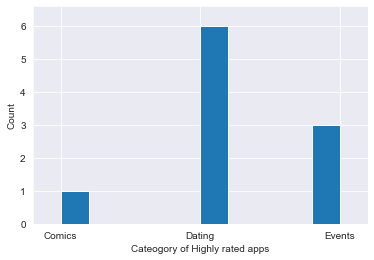

In [60]:
sns.set_style('darkgrid')
plt.hist(top_rated['Genres'])
plt.xlabel("Cateogory of Highly rated apps")
plt.ylabel("Count")
plt.margins(0.1)
plt.show()


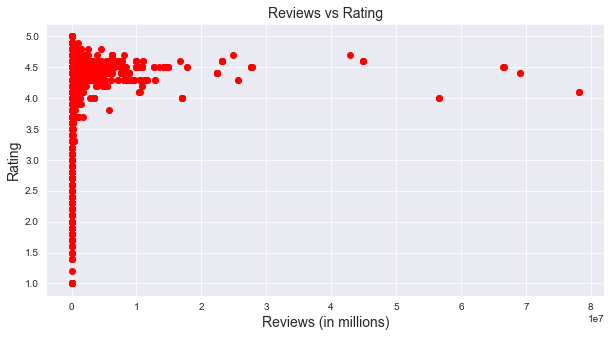

In [62]:
plt.figure(figsize=(10,5))
plt.scatter(app['Reviews'],app['Rating'],color="r")
plt.xlabel('Reviews (in millions)',fontsize=14)
plt.ylabel('Rating',fontsize=14)
plt.title('Reviews vs Rating',fontsize=14)
plt.show()

In [ ]:

df = sns.load_dataset('')
sns.boxplot(y=app['Type']);
plt.show()